<a href="https://colab.research.google.com/github/manikcb/all-my-assignments/blob/main/svm86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt

In [19]:
df = pd.read_csv(r"/content/DATABASE-KERATOCONUSorgc2.csv")

In [22]:
df.head(10)

,Edad,label,Ojo,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,...,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,label1
0,24,H,OD,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,...,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,M
1,24,H,OI,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,...,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,M
2,20,H,OD,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,...,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,M
3,20,H,OI,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,...,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,M
4,23,M,OD,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,...,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,M
5,23,M,OI,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,...,0.270,-0.052,0.012,-0.042,0.068,-0.055,-0.040,0.013,0.105,M
6,68,M,OD,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,...,-0.099,0.053,-0.022,0.045,0.056,-0.050,-0.077,-0.080,0.242,M
7,68,M,OI,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,...,0.007,0.013,0.018,0.047,0.200,0.085,-0.054,-0.097,0.459,M
8,60,M,OD,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,...,-0.090,0.054,-0.040,0.045,0.056,-0.006,0.092,-0.018,0.249,M
9,60,M,OI,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,...,0.006,0.012,0.016,0.047,0.200,-0.097,-0.074,-0.091,0.440,M


In [25]:
df=pd.get_dummies(df, columns=['label','label1'])
df.head(10)

KeyError: ignored

In [26]:
df.head(10)

,Edad,Ojo,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,...,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,label_H,label_M,label1_H,label1_M
0,24,OD,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,...,-0.429,0.110,0.038,-0.035,0.122,0.253,1,0,0,1
1,24,OI,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,...,0.191,0.080,-0.047,-0.029,-0.047,0.201,1,0,0,1
2,20,OD,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,...,0.113,-0.091,-0.037,-0.292,0.035,-0.085,1,0,0,1
3,20,OI,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,...,-0.006,0.093,0.190,-0.165,0.040,-0.068,1,0,0,1
4,23,OD,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,...,-0.129,0.050,0.158,-0.104,-0.138,0.131,0,1,0,1
5,23,OI,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,0.18,...,-0.042,0.068,-0.055,-0.040,0.013,0.105,0,1,0,1
6,68,OD,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,0.08,...,0.045,0.056,-0.050,-0.077,-0.080,0.242,0,1,0,1
7,68,OI,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,0.05,...,0.047,0.200,0.085,-0.054,-0.097,0.459,0,1,0,1
8,60,OD,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,0.08,...,0.045,0.056,-0.006,0.092,-0.018,0.249,0,1,0,1
9,60,OI,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,0.04,...,0.047,0.200,-0.097,-0.074,-0.091,0.440,0,1,0,1


In [35]:
y = df['label_H']
X=df.drop(columns=['label_H','label_M','label1_H','Ojo'])


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
print(len(X_train))
print(len(X_test))

574
246


In [38]:
model = SVC(kernel='linear')

In [39]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1]


In [41]:
percentage = model.score(X_test, y_test)

In [42]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[112  14]
 [ 18 102]]
Test Set: 246
Accuracy = 86.99186991869918 %


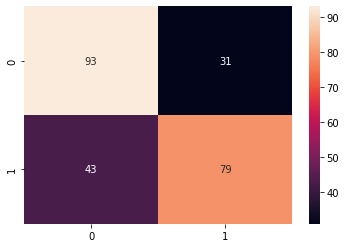

In [ ]:
import seaborn as sns
sns.heatmap(res, annot=True)